# Wine Quality predictor

Let's begin with the project -
* so firstly we will import libraries.
* Then we will read our both files : winer- for red wine & winew - for white wine.
* We will add one more column(*'type'*) to the each file individualy which decribe the wine type as mentioned below:
  1 for red wine & 0 for white wine .
* We will concat or merge the both files in order to make the main file large

In [ ]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('winer.csv',delimiter=';')
dat = pd.read_csv('winew.csv',delimiter=';')

In [3]:
data['type']=1
dat['type']=0

In [4]:
df = pd.concat([data, dat])
df1 = df.copy()
df = df.dropna()
df.reset_index(drop=True ,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## Adding Required Feature
**since our main target is to predict the quality as good or baad, therefore we will consider the <6 scaled wine as bad and 6< as good.**

In [5]:
def condition(s) :
    if s['quality'] < 6 :
        return 1
    elif s['quality'] >= 6 :
        return 2

df['goodq']=df.apply(condition, axis=1)

**Since we have made a seperate column goodq for quality check, we will drop or delete the main quality column and get our column names.** 

In [6]:
df = df.drop('quality',axis = 1)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'goodq'],
      dtype='object')

In [7]:
df['goodq'].value_counts()

2    4113
1    2384
Name: goodq, dtype: int64

## EDA & Machine learning

We will import the impotant libraries for data analysis and machine learning.
* We will use heatmap to check the positive or negative correlation between features which will further help us in feature    
  selection.
* We will use decision trees as our machine learning algorithm .

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

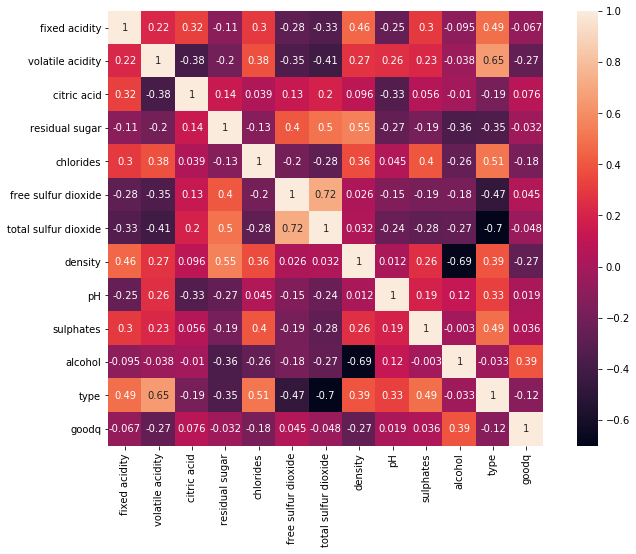

In [12]:
cormat = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type' ,'goodq']].corr()
plt.subplots(figsize=(12,8))
sns.heatmap(cormat,square=True,annot = True)

### now we will split the data set for train-testing & apply our ML algorithm using Scikit learn . At last we will also check the accuracy of our model .

In [10]:
x=df[['volatile acidity', 'density', 'alcohol','chlorides','type']].values
y=df['goodq'].values
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
#Train/Test split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.4, random_state=3)
#Train Model and Predict
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,y_trainset)
predTree = drugTree.predict(X_testset)

#accuracy
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print(classification_report(y_testset, predTree))

DecisionTrees's Accuracy:  0.7414390150057715
              precision    recall  f1-score   support

           1       0.68      0.52      0.59       930
           2       0.76      0.87      0.81      1669

    accuracy                           0.74      2599
   macro avg       0.72      0.69      0.70      2599
weighted avg       0.73      0.74      0.73      2599



#### Saving the merged file so that we can use it in main project for deployment of the model.

In [11]:
df.to_csv('wine.csv',index=False)